In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities[10]


'tuktoyaktuk'

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
cities_list = []
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    cities_list.append(city_url)akl
    print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440&q=ozinki
Processing Record 1 of Set 1 | ozinki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440&q=nizhneyansk
Processing Record 2 of Set 1 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440&q=richards+bay
Processing Record 3 of Set 1 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440&q=chuy
Processing Record 4 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440&q=albany
Processing Record 5 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f4440&q=hilo
Processing Record 6 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1370ee5b09ccb9b8c2528c77c7f44

In [8]:
# Run an API request for each of the cities.
n = len(cities_list)
i = 0
for city_url in cities_list:
    print(i/n)
    i += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print("City found")
    # If an error is experienced, skip the city.
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

0.0
City found
0.0016339869281045752
'coord'
City not found. Skipping...
0.0032679738562091504
City found
0.004901960784313725
City found
0.006535947712418301
City found
0.008169934640522876
City found
0.00980392156862745
City found
0.011437908496732025
City found
0.013071895424836602
'coord'
City not found. Skipping...
0.014705882352941176
City found
0.016339869281045753
City found
0.017973856209150325
City found
0.0196078431372549
City found
0.021241830065359478
City found
0.02287581699346405
City found
0.024509803921568627
City found
0.026143790849673203
City found
0.027777777777777776
City found
0.029411764705882353
City found
0.03104575163398693
City found
0.032679738562091505
City found
0.03431372549019608
City found
0.03594771241830065
City found
0.03758169934640523
City found
0.0392156862745098
City found
0.04084967320261438
City found
0.042483660130718956
City found
0.04411764705882353
City found
0.0457516339869281
City found
0.04738562091503268
'coord'
City not found. Skippin

City found
0.41013071895424835
City found
0.4117647058823529
City found
0.4133986928104575
City found
0.4150326797385621
City found
0.4166666666666667
City found
0.41830065359477125
City found
0.4199346405228758
City found
0.4215686274509804
City found
0.42320261437908496
City found
0.42483660130718953
City found
0.4264705882352941
City found
0.42810457516339867
City found
0.4297385620915033
City found
0.43137254901960786
'coord'
City not found. Skipping...
0.43300653594771243
City found
0.434640522875817
City found
0.4362745098039216
City found
0.43790849673202614
City found
0.4395424836601307
City found
0.4411764705882353
City found
0.44281045751633985
City found
0.4444444444444444
City found
0.44607843137254904
City found
0.4477124183006536
City found
0.4493464052287582
City found
0.45098039215686275
City found
0.4526143790849673
'coord'
City not found. Skipping...
0.4542483660130719
City found
0.45588235294117646
City found
0.45751633986928103
City found
0.4591503267973856
City fou

City found
0.8316993464052288
City found
0.8333333333333334
City found
0.8349673202614379
City found
0.8366013071895425
'coord'
City not found. Skipping...
0.8382352941176471
City found
0.8398692810457516
City found
0.8415032679738562
City found
0.8431372549019608
City found
0.8447712418300654
City found
0.8464052287581699
City found
0.8480392156862745
City found
0.8496732026143791
City found
0.8513071895424836
City found
0.8529411764705882
City found
0.8545751633986928
City found
0.8562091503267973
City found
0.8578431372549019
City found
0.8594771241830066
City found
0.8611111111111112
City found
0.8627450980392157
City found
0.8643790849673203
'coord'
City not found. Skipping...
0.8660130718954249
City found
0.8676470588235294
City found
0.869281045751634
City found
0.8709150326797386
City found
0.8725490196078431
City found
0.8741830065359477
City found
0.8758169934640523
City found
0.8774509803921569
City found
0.8790849673202614
City found
0.880718954248366
City found
0.882352941

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Durazno,51.1786,49.6769,32.67,99,100,3.04,RU,2021-04-03 15:27:45
1,Durazno,-28.7830,32.0377,71.71,69,86,14.05,ZA,2021-04-03 15:27:46
2,Durazno,-33.6971,-53.4616,74.62,53,49,8.08,UY,2021-04-03 15:27:46
3,Durazno,42.6001,-73.9662,42.01,21,0,8.72,US,2021-04-03 15:24:40
4,Durazno,19.7297,-155.0900,68.00,83,75,3.96,US,2021-04-03 15:22:49
...,...,...,...,...,...,...,...,...,...
561,Durazno,40.1629,-8.3327,71.01,83,33,1.99,PT,2021-04-03 15:31:32
562,Durazno,-11.7022,43.2551,86.00,74,40,12.66,KM,2021-04-03 15:31:33
563,Durazno,66.5300,66.6019,10.83,95,18,4.43,RU,2021-04-03 15:31:33
564,Durazno,64.2457,12.3778,39.43,97,99,19.30,NO,2021-04-03 15:31:33


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Durazno,51.1786,49.6769,32.67,99,100,3.04,RU,2021-04-03 15:27:45
3,Durazno,42.6001,-73.9662,42.01,21,0,8.72,US,2021-04-03 15:24:40
4,Durazno,19.7297,-155.0900,68.00,83,75,3.96,US,2021-04-03 15:22:49
5,Durazno,59.0556,80.8572,33.37,98,100,8.84,RU,2021-04-03 15:27:47
7,Durazno,78.2186,15.6401,17.60,73,20,10.36,SJ,2021-04-03 15:27:24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

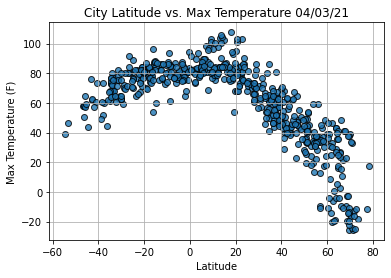

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

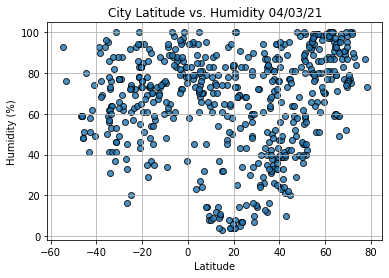

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

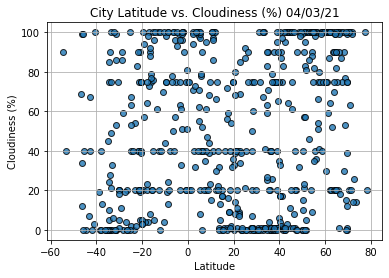

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

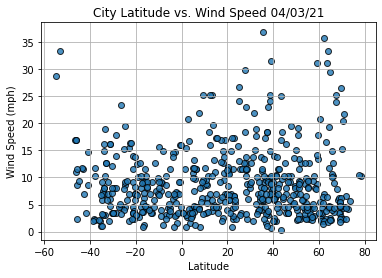

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#doubt
# Import linregress
from scipy.stats import linregress
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

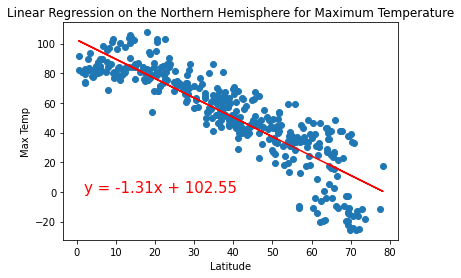

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(2,0))

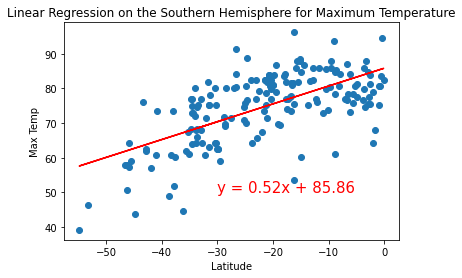

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,50))

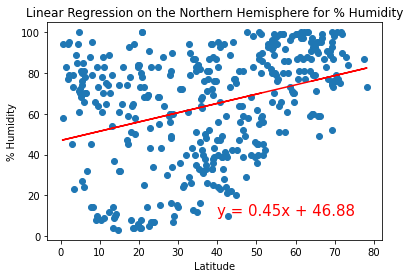

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

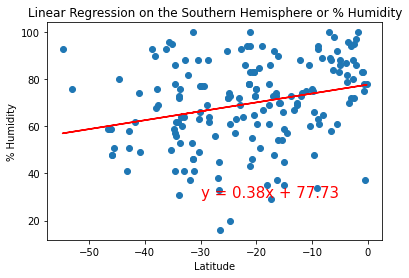

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere or % Humidity', '% Humidity',(-30,30))

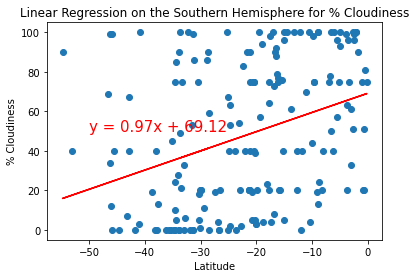

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,50))

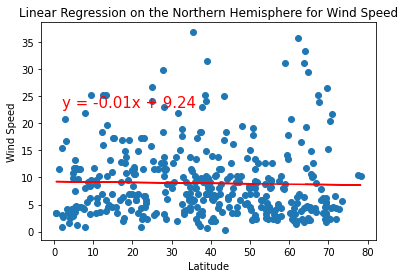

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(2,23))

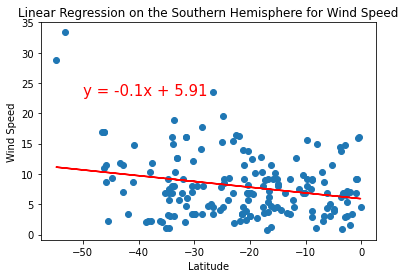

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,23))